<a href="https://colab.research.google.com/github/ImanFakury/imanRepository/blob/master/DeepLearning/CHW3/Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Larning Course
## Assignment3-Q1
### Iman Alizadeh Fakouri(401102134)

# Part 1

In [62]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [63]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [64]:
# Hyperparameters
batch_size = 64
num_epochs = 20
learning_rate = 0.001

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),#This line normalizes channels to have values in range of(-1,1)
])
#Split Train data into train and validation set
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_size = len(trainset) - 10000
val_size = 10000
train_subset, val_subset = torch.utils.data.random_split(trainset, [train_size, val_size])
trainloader = torch.utils.data.DataLoader(train_subset, batch_size=batch_size, shuffle=True, num_workers=2)
valloader = torch.utils.data.DataLoader(val_subset, batch_size=batch_size, shuffle=False, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)


Files already downloaded and verified
Files already downloaded and verified


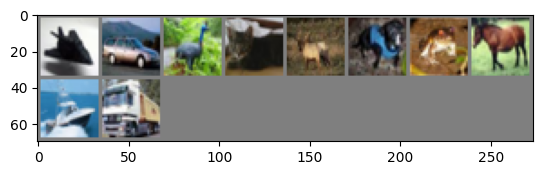

Class 1: Airplane
Class 2: Automobile
Class 3: Bird
Class 4: Cat
Class 5: Deer
Class 6: Dog
Class 7: Frog
Class 8: Horse
Class 9: Ship
Class 10: Truck


In [65]:
#class names for CIFAR-10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

def imshow(img):
    img = img / 2 + 0.5  #reverse the normalization
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  #convert from (C, H, W) to (H, W, C)
    plt.show()

images_per_class = {i: None for i in range(10)}

for image, label in trainset:
    if images_per_class[label] is None:
            images_per_class[label] = image
    if all(v is not None for v in images_per_class.values()):
        break
selected_images = [images_per_class[i] for i in range(10)]
imshow(torchvision.utils.make_grid(selected_images))
for i in range(10):
    print(f"Class {i+1}: {class_names[i]}")


# Part 2

In [66]:
class BaselineModel(nn.Module):
    def __init__(self):
        super(BaselineModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5 )
        self.relu=nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten=nn.Flatten()
        self.fc= nn.Linear(32*14*14,10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.flatten(x)
        x = self.fc(x)
        return x

model = BaselineModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [67]:
from torchsummary import summary
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]           2,432
              ReLU-2           [-1, 32, 28, 28]               0
         MaxPool2d-3           [-1, 32, 14, 14]               0
           Flatten-4                 [-1, 6272]               0
            Linear-5                   [-1, 10]          62,730
Total params: 65,162
Trainable params: 65,162
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.48
Params size (MB): 0.25
Estimated Total Size (MB): 0.74
----------------------------------------------------------------


In [68]:
train_losses = []
train_accuracies = []
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    correct_predictions = 0
    total_predictions = 0

    for inputs, targets in trainloader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == targets).sum().item()
        total_predictions += targets.size(0)

    avg_loss = epoch_loss / len(trainloader)
    train_losses.append(avg_loss)
    avg_accuracy = 100 * correct_predictions / total_predictions
    train_accuracies.append(avg_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {avg_accuracy:.2f}%')


Epoch [1/20], Loss: 2.1234, Accuracy: 26.03%
Epoch [2/20], Loss: 1.9451, Accuracy: 33.06%
Epoch [3/20], Loss: 1.8599, Accuracy: 35.98%
Epoch [4/20], Loss: 1.7997, Accuracy: 37.96%
Epoch [5/20], Loss: 1.7500, Accuracy: 39.80%
Epoch [6/20], Loss: 1.7058, Accuracy: 41.55%
Epoch [7/20], Loss: 1.6665, Accuracy: 42.88%
Epoch [8/20], Loss: 1.6297, Accuracy: 44.02%
Epoch [9/20], Loss: 1.5958, Accuracy: 45.41%
Epoch [10/20], Loss: 1.5646, Accuracy: 46.24%
Epoch [11/20], Loss: 1.5358, Accuracy: 47.40%
Epoch [12/20], Loss: 1.5094, Accuracy: 48.23%
Epoch [13/20], Loss: 1.4848, Accuracy: 49.06%
Epoch [14/20], Loss: 1.4623, Accuracy: 49.73%
Epoch [15/20], Loss: 1.4415, Accuracy: 50.45%
Epoch [16/20], Loss: 1.4230, Accuracy: 50.94%
Epoch [17/20], Loss: 1.4056, Accuracy: 51.62%
Epoch [18/20], Loss: 1.3901, Accuracy: 52.19%
Epoch [19/20], Loss: 1.3760, Accuracy: 52.50%
Epoch [20/20], Loss: 1.3624, Accuracy: 52.86%


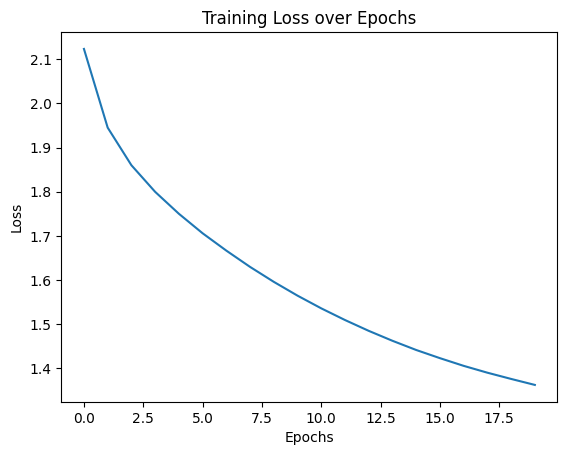

In [69]:
plt.plot(train_losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

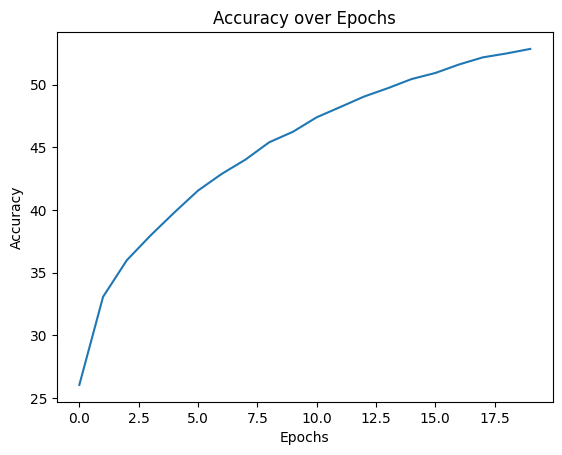

In [70]:
plt.plot(train_accuracies)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.show()

In [71]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, targets in valloader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

print(f'Train Accuracy: {100 * correct / total:.2f}%')

Train Accuracy: 52.57%


In [72]:
torch.save(model.state_dict(), 'cifar10_cnn1.pth')
print('Model checkpoint saved!')

Model checkpoint saved!


# Part 3

In [73]:
class BaselineModel2(nn.Module):
    def __init__(self):
        super(BaselineModel2, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=96,  kernel_size=5 , padding=2)
        self.conv2 = nn.Conv2d(in_channels=96, out_channels=128, kernel_size=5 , padding=2 )
        self.conv3 = nn.Conv2d(in_channels=128, out_channels=192, kernel_size=5, padding=2)
        self.conv4 = nn.Conv2d(in_channels=192, out_channels=128, kernel_size=5, padding=2)
        self.relu=nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten=nn.Flatten()
        self.fc1= nn.Linear(128*8*8,512)
        self.fc2= nn.Linear(512,128)
        self.fc3= nn.Linear(128,10)

    def forward(self, x):
        x = self.maxpool(self.relu(self.conv1(x)))
        x = self.maxpool(self.relu(self.conv2(x)))
        x = self.relu(self.conv3(x))
        x = self.relu(self.conv4(x))
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = BaselineModel2().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [74]:
from torchsummary import summary
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 32, 32]           7,296
              ReLU-2           [-1, 96, 32, 32]               0
         MaxPool2d-3           [-1, 96, 16, 16]               0
            Conv2d-4          [-1, 128, 16, 16]         307,328
              ReLU-5          [-1, 128, 16, 16]               0
         MaxPool2d-6            [-1, 128, 8, 8]               0
            Conv2d-7            [-1, 192, 8, 8]         614,592
              ReLU-8            [-1, 192, 8, 8]               0
            Conv2d-9            [-1, 128, 8, 8]         614,528
             ReLU-10            [-1, 128, 8, 8]               0
          Flatten-11                 [-1, 8192]               0
           Linear-12                  [-1, 512]       4,194,816
             ReLU-13                  [-1, 512]               0
           Linear-14                  [

In [75]:
train_losses = []
train_accuracies = []
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    correct_predictions = 0
    total_predictions = 0

    for inputs, targets in trainloader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == targets).sum().item()
        total_predictions += targets.size(0)

    avg_loss = epoch_loss / len(trainloader)
    train_losses.append(avg_loss)
    avg_accuracy = 100 * correct_predictions / total_predictions
    train_accuracies.append(avg_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {avg_accuracy:.2f}%')


Epoch [1/20], Loss: 2.3038, Accuracy: 10.08%
Epoch [2/20], Loss: 2.3034, Accuracy: 10.08%
Epoch [3/20], Loss: 2.3030, Accuracy: 10.08%
Epoch [4/20], Loss: 2.3027, Accuracy: 10.08%
Epoch [5/20], Loss: 2.3023, Accuracy: 10.08%
Epoch [6/20], Loss: 2.3019, Accuracy: 10.08%
Epoch [7/20], Loss: 2.3014, Accuracy: 10.08%
Epoch [8/20], Loss: 2.3008, Accuracy: 10.10%
Epoch [9/20], Loss: 2.3001, Accuracy: 10.40%
Epoch [10/20], Loss: 2.2993, Accuracy: 10.92%
Epoch [11/20], Loss: 2.2980, Accuracy: 13.06%
Epoch [12/20], Loss: 2.2962, Accuracy: 16.05%
Epoch [13/20], Loss: 2.2933, Accuracy: 18.12%
Epoch [14/20], Loss: 2.2879, Accuracy: 20.25%
Epoch [15/20], Loss: 2.2766, Accuracy: 19.40%
Epoch [16/20], Loss: 2.2500, Accuracy: 17.93%
Epoch [17/20], Loss: 2.1904, Accuracy: 19.03%
Epoch [18/20], Loss: 2.0852, Accuracy: 22.40%
Epoch [19/20], Loss: 2.0169, Accuracy: 25.61%
Epoch [20/20], Loss: 1.9826, Accuracy: 26.98%


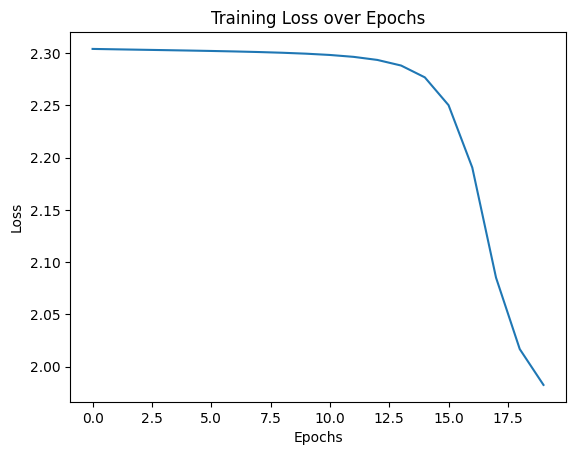

In [76]:
plt.plot(train_losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

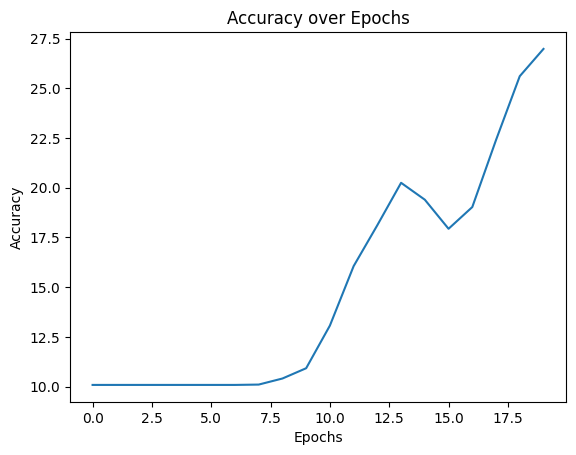

In [77]:
plt.plot(train_accuracies)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.show()

In [78]:
torch.save(model.state_dict(), 'cifar10_cnn2.pth')
print('Model checkpoint saved!')

Model checkpoint saved!


We see that the model's accuracy has decreased noticebaly despite adding new layers to our network.This suggets that gradient vanishing has happened and we should add new layers to control that.

In [79]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, targets in valloader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

print(f'Train Accuracy: {100 * correct / total:.2f}%')

Train Accuracy: 28.44%


# Part 4

In [80]:
class BaselineModel3(nn.Module):
    def __init__(self):
        super(BaselineModel3, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=96, kernel_size=5, padding=2)
        self.bn1 = nn.BatchNorm2d(96)
        self.conv2 = nn.Conv2d(in_channels=96, out_channels=128, kernel_size=5, padding=2)
        self.bn2 = nn.BatchNorm2d(128)
        self.conv3 = nn.Conv2d(in_channels=128, out_channels=192, kernel_size=5, padding=2)
        self.bn3 = nn.BatchNorm2d(192)
        self.conv4 = nn.Conv2d(in_channels=192, out_channels=128, kernel_size=5, padding=2)
        self.bn4 = nn.BatchNorm2d(128)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128 * 8 * 8, 512)
        self.bn_fc1 = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512, 128)
        self.bn_fc2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.maxpool(self.relu(self.bn1(self.conv1(x))))
        x = self.maxpool(self.relu(self.bn2(self.conv2(x))))
        x = self.relu(self.bn3(self.conv3(x)))
        x = self.relu(self.bn4(self.conv4(x)))
        x = self.flatten(x)
        x = self.relu(self.bn_fc1(self.fc1(x)))
        x = self.relu(self.bn_fc2(self.fc2(x)))
        x = self.fc3(x)

        return x

model = BaselineModel3().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
train_losses = []
train_accuracies = []
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    correct_predictions = 0
    total_predictions = 0

    for inputs, targets in trainloader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == targets).sum().item()
        total_predictions += targets.size(0)

    avg_loss = epoch_loss / len(trainloader)
    train_losses.append(avg_loss)
    avg_accuracy = 100 * correct_predictions / total_predictions
    train_accuracies.append(avg_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {avg_accuracy:.2f}%')


Epoch [1/20], Loss: 1.7008, Accuracy: 42.82%
Epoch [2/20], Loss: 1.3461, Accuracy: 56.40%
Epoch [3/20], Loss: 1.1580, Accuracy: 63.44%
Epoch [4/20], Loss: 1.0185, Accuracy: 68.42%
Epoch [5/20], Loss: 0.9077, Accuracy: 72.10%
Epoch [6/20], Loss: 0.8040, Accuracy: 76.05%
Epoch [7/20], Loss: 0.7135, Accuracy: 79.31%
Epoch [8/20], Loss: 0.6253, Accuracy: 82.88%
Epoch [9/20], Loss: 0.5463, Accuracy: 85.69%
Epoch [10/20], Loss: 0.4716, Accuracy: 88.75%
Epoch [11/20], Loss: 0.4014, Accuracy: 91.46%
Epoch [12/20], Loss: 0.3333, Accuracy: 93.91%
Epoch [13/20], Loss: 0.2767, Accuracy: 95.72%
Epoch [14/20], Loss: 0.2240, Accuracy: 97.23%
Epoch [15/20], Loss: 0.1829, Accuracy: 98.29%
Epoch [16/20], Loss: 0.1481, Accuracy: 98.95%
Epoch [17/20], Loss: 0.1222, Accuracy: 99.34%
Epoch [18/20], Loss: 0.1015, Accuracy: 99.61%
Epoch [19/20], Loss: 0.0837, Accuracy: 99.78%
Epoch [20/20], Loss: 0.0712, Accuracy: 99.84%


In [81]:
from torchsummary import summary
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 32, 32]           7,296
       BatchNorm2d-2           [-1, 96, 32, 32]             192
              ReLU-3           [-1, 96, 32, 32]               0
         MaxPool2d-4           [-1, 96, 16, 16]               0
            Conv2d-5          [-1, 128, 16, 16]         307,328
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
         MaxPool2d-8            [-1, 128, 8, 8]               0
            Conv2d-9            [-1, 192, 8, 8]         614,592
      BatchNorm2d-10            [-1, 192, 8, 8]             384
             ReLU-11            [-1, 192, 8, 8]               0
           Conv2d-12            [-1, 128, 8, 8]         614,528
      BatchNorm2d-13            [-1, 128, 8, 8]             256
             ReLU-14            [-1, 12

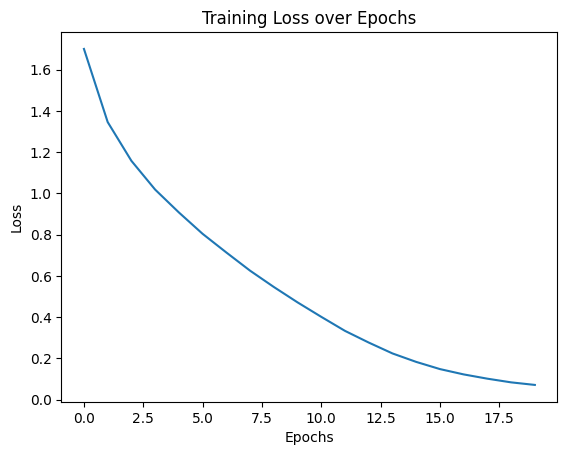

In [82]:
plt.plot(train_losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

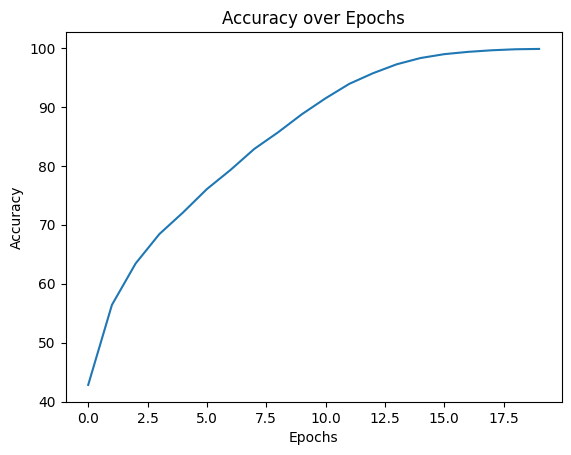

In [83]:
plt.plot(train_accuracies)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.show()

We see a huge increase in model's accuracy by adding batch normalization layers.It suggests that gradient vanishing problem has been solved.
Batch normalization (BN) can help reduce the vanishing gradient problem, although it’s not specifically designed for that purpose. BN works by normalizing the inputs to each layer, which:

Stabilizes activations: Ensures consistent input ranges for layers, preventing extremely small gradients.
Reduces saturation: Keeps activation function inputs (e.g., sigmoid/tanh) from reaching flat regions, where gradients are near zero.
Improves weight initialization: Makes training deeper networks easier and more stable.
Adds regularization: Noise from batch statistics smooths the optimization landscape.

In [84]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, targets in valloader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

print(f'Train Accuracy: {100 * correct / total:.2f}%')

Train Accuracy: 69.91%


In [85]:
torch.save(model.state_dict(), 'cifar10_cnn3.pth')
print('Model checkpoint saved!')

Model checkpoint saved!


# Part 5

In [93]:
class BaselineModel4(nn.Module):
    def __init__(self):
        super(BaselineModel4, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=96, kernel_size=5, padding=2)
        self.conv2 = nn.Conv2d(in_channels=96, out_channels=128, kernel_size=5, padding=2)
        self.conv3 = nn.Conv2d(in_channels=128, out_channels=192, kernel_size=5, padding=2)
        self.conv4 = nn.Conv2d(in_channels=192, out_channels=128, kernel_size=5, padding=2)
        self.bn1 = nn.BatchNorm2d(96)
        self.bn2 = nn.BatchNorm2d(128)
        self.bn3 = nn.BatchNorm2d(192)
        self.bn4 = nn.BatchNorm2d(128)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 10)
        self.bn_fc1 = nn.BatchNorm1d(512)
        self.bn_fc2 = nn.BatchNorm1d(128)
        self.dropout1 = nn.Dropout(p=0.5)
        self.dropout2 = nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.maxpool(self.relu(self.bn1(self.conv1(x))))
        x = self.maxpool(self.relu(self.bn2(self.conv2(x))))
        x = self.relu(self.bn3(self.conv3(x)))
        x = self.relu(self.bn4(self.conv4(x)))
        x = self.flatten(x)
        x = self.relu(self.bn_fc1(self.fc1(x)))
        x = self.dropout1(x)
        x = self.relu(self.bn_fc2(self.fc2(x)))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

model = BaselineModel4().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

train_losses = []
train_accuracies = []
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    correct_predictions = 0
    total_predictions = 0

    for inputs, targets in trainloader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == targets).sum().item()
        total_predictions += targets.size(0)

    avg_loss = epoch_loss / len(trainloader)
    train_losses.append(avg_loss)
    avg_accuracy = 100 * correct_predictions / total_predictions
    train_accuracies.append(avg_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {avg_accuracy:.5f}%')

Epoch [1/20], Loss: 1.9801, Accuracy: 29.84250%
Epoch [2/20], Loss: 1.6628, Accuracy: 42.73500%
Epoch [3/20], Loss: 1.5020, Accuracy: 48.47500%
Epoch [4/20], Loss: 1.3869, Accuracy: 52.72500%
Epoch [5/20], Loss: 1.2849, Accuracy: 56.44000%
Epoch [6/20], Loss: 1.2043, Accuracy: 59.55750%
Epoch [7/20], Loss: 1.1306, Accuracy: 62.36000%
Epoch [8/20], Loss: 1.0656, Accuracy: 64.75750%
Epoch [9/20], Loss: 1.0145, Accuracy: 66.40750%
Epoch [10/20], Loss: 0.9617, Accuracy: 68.27750%
Epoch [11/20], Loss: 0.9187, Accuracy: 69.79250%
Epoch [12/20], Loss: 0.8719, Accuracy: 71.63750%
Epoch [13/20], Loss: 0.8362, Accuracy: 72.56750%
Epoch [14/20], Loss: 0.7917, Accuracy: 74.54250%
Epoch [15/20], Loss: 0.7580, Accuracy: 75.43500%
Epoch [16/20], Loss: 0.7235, Accuracy: 76.57750%
Epoch [17/20], Loss: 0.6929, Accuracy: 77.62250%
Epoch [18/20], Loss: 0.6578, Accuracy: 78.77750%
Epoch [19/20], Loss: 0.6202, Accuracy: 80.28500%
Epoch [20/20], Loss: 0.5898, Accuracy: 81.63250%


In [100]:
from torchsummary import summary
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 32, 32]           7,296
       BatchNorm2d-2           [-1, 96, 32, 32]             192
              ReLU-3           [-1, 96, 32, 32]               0
         MaxPool2d-4           [-1, 96, 16, 16]               0
            Conv2d-5          [-1, 128, 16, 16]         307,328
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
         MaxPool2d-8            [-1, 128, 8, 8]               0
            Conv2d-9            [-1, 192, 8, 8]         614,592
      BatchNorm2d-10            [-1, 192, 8, 8]             384
             ReLU-11            [-1, 192, 8, 8]               0
           Conv2d-12            [-1, 128, 8, 8]         614,528
      BatchNorm2d-13            [-1, 128, 8, 8]             256
             ReLU-14            [-1, 12

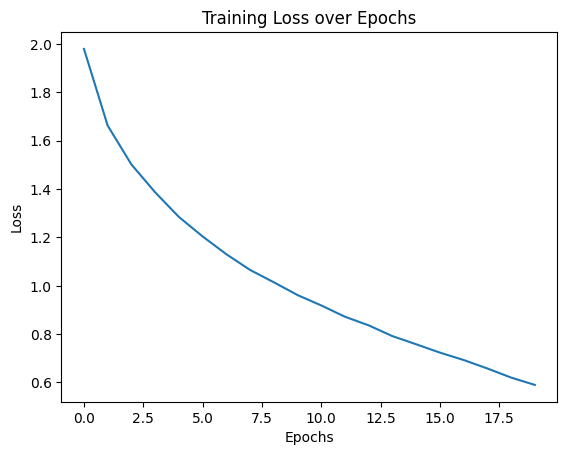

In [101]:
plt.plot(train_losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

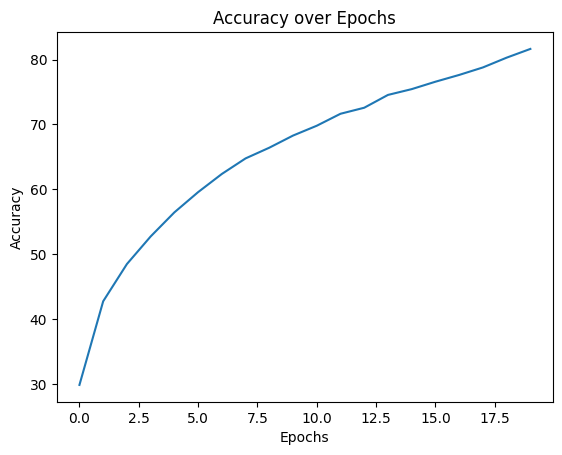

In [102]:
plt.plot(train_accuracies)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.show()

We can see that model's accuracy has increased slightly by adding droput to fully connected layers.This is because of regulariztion effect of droput.

In [103]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, targets in valloader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

print(f'Train Accuracy: {100 * correct / total:.2f}%')

Train Accuracy: 71.72%


In [104]:
torch.save(model.state_dict(), 'cifar10_cnn4.pth')
print('Model checkpoint saved!')

Model checkpoint saved!


<ipython-input-105-f92729970ea7>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load('cifar10_cnn4.pth'))


Model checkpoint loaded!
Classification Report:
              precision    recall  f1-score   support

    Airplane       0.81      0.78      0.79      1000
  Automobile       0.86      0.83      0.84      1000
        Bird       0.60      0.67      0.64      1000
         Cat       0.53      0.49      0.51      1000
        Deer       0.76      0.54      0.63      1000
         Dog       0.49      0.78      0.60      1000
        Frog       0.86      0.73      0.79      1000
       Horse       0.75      0.76      0.75      1000
        Ship       0.90      0.80      0.85      1000
       Truck       0.82      0.82      0.82      1000

    accuracy                           0.72     10000
   macro avg       0.74      0.72      0.72     10000
weighted avg       0.74      0.72      0.72     10000



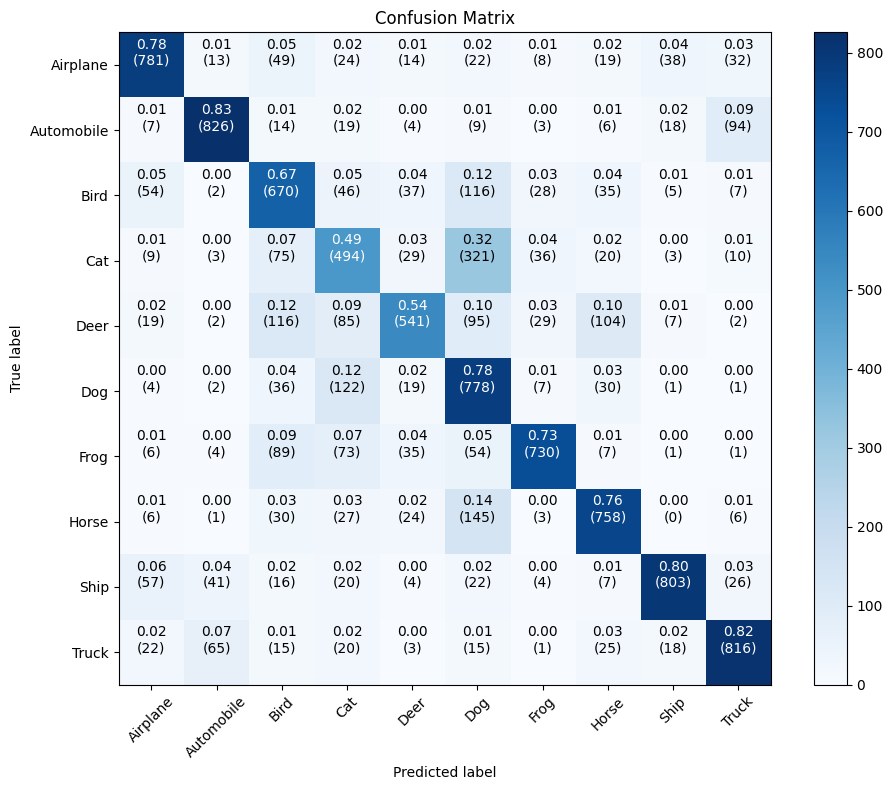

In [105]:
loaded_model = BaselineModel4()
loaded_model.to(device)
loaded_model.load_state_dict(torch.load('cifar10_cnn4.pth'))
print('Model checkpoint loaded!')

from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, auc
loaded_model.eval()
y_true = []
y_pred = []
y_scores = []

with torch.no_grad():
    for inputs, targets in testloader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = loaded_model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(targets.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())
        y_scores.extend(F.softmax(outputs, dim=1).cpu().numpy())
y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_scores = np.array(y_scores)
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
normalized_conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
thresh = normalized_conf_matrix.max() / 2.0
for i, j in np.ndindex(normalized_conf_matrix.shape):
    plt.text(j, i, f"{normalized_conf_matrix[i, j]:.2f}\n({conf_matrix[i, j]})",
             horizontalalignment="center",
             color="white" if normalized_conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()